# Exploratory analysys of the movies box offices







**Author:**  Andrei Mikhailov  
**email:** am@mikhailovandrei.com  
**Flex Program:**  
**Instructor name:** Joe Comeaux
***

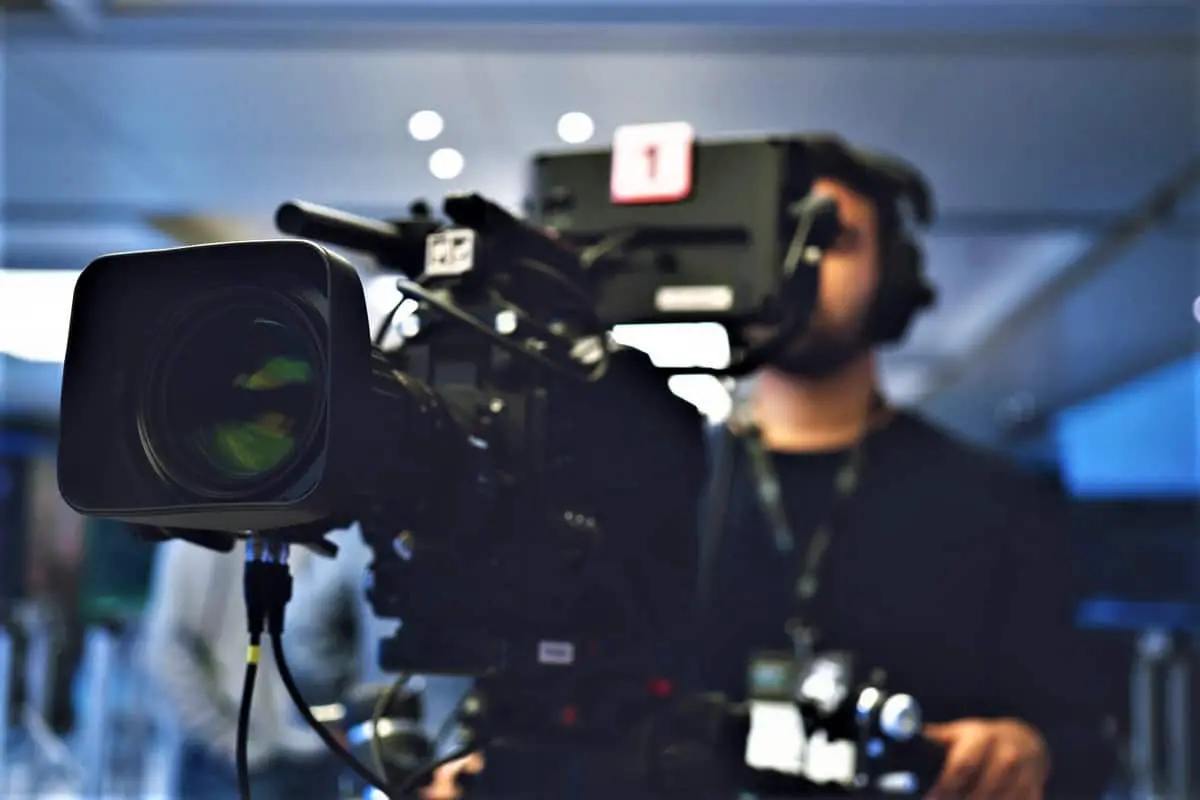
Image: cicnews.com

## Overview

During this project, we will be investigating movie datasets using exploratory analysis for the customer, who is new to the movie industry. For the sake of research, we will use the following datasets (with formats): 

 - The Internet Movie DataBase (IDMB), SQL
 - Rotten Tomatoes, TSV
 - The Movie DataBase (TMDB), CSV
 - The Numbers (TN), CSV
 - Box Office Mojo (BOM), CSV
 
We will employ Pandas, SQLITE3, MatPlotLib, and SeaBorn libraries. 
 
Considering the customer strategy **'Comprehensive Products Revolutionising Services Across Globe'** we choose worldwide box office as the primary metric for measuring films' success as it reflects global audience coverage most unambiguously in the given datasets. 

We will research **box offices by month of a film release, box office by genres in two different datasets, trending genres, ROI by genres, and top producers by box offices of films they took part in for the 2010-2018 years**. We choose the latter assuming that the customer may want to consult or hire subject matter experts. 

***

## Business Problem

The customer wants to expand and create a movie studio, and the main challenge is that they don't have any expertise in the industry. Our primary goals in this project are generating insight and making further recommendations to the decision-makers. 

We assume that before investing in the movie studio, the customer may want to know which genres are trending globally and what are their cummulative box offices, or, in other words, what is the industry size by genres. We also think that the customer, who wants to produce movies by themself, may wish to hire subject matter experts (producers) to reduce potential risks accompanied by entering a highly-competitive industry. 


***

## Data Understanding

During the following steps, we will load and expore the datasets we have and decide if data represented in each of them is relevant for our research. 

In [1]:
# In this section we import necessary libriaries for working with our datasets
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import string
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# Connecting IMDB SQL Dataset
conn=sqlite3.connect('data/im.db')
# Loading Box Office Mojo (BOM) Dataset
df_bom = pd.read_csv('data/bom.movie_gross.csv')
# Loading Rotten Tomatoes Movie Dataset
df_rt_movie = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
# Loading Rotten Tomatoes Review Dataset
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='windows-1252')
# Loading The Movie Dataset
df_tmdb = pd.read_csv('data/tmdb.movies.csv')
# Loading The Numbers Dataset
df_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [3]:
df_rt_movie.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In this dataset we have genres and box office columns. Next we will check missing values.

In [4]:
# Checking number of missing values in 'box_office' column
df_rt_movie['box_office'].isna().sum()

1220

In [5]:
# Checking number of missing values in 'genre' column
df_rt_movie['genre'].isna().sum()

8

In [6]:
# Retrieving the dataset info
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


We have about 80% of missing values in the **'box_office'** column, and 8 missing values in **'genre'** column. Next we explore **Box Office Mojo** dataset.

In [7]:
#Retrieving the first five records of the Box Office Mojo dataset. 
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
# The Box Office Mojo dataset info
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Box Office Mojo contains **box office data, movie title, and release year**. Most of the values are present. 

In [9]:
#Retrieving the first five records of the Rotten Tomatoes Reviews dataset. 
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In the Rotten Tomato reviews dataset there is nor box office or genre information, neither release date. 

In [10]:
#Getting the first five records of The Movie DataBase
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
#Retrieving the database info
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


This dataset has the infromation about movies genre represented as numerical 'id' but there is no actual genre name or type. It also does't have any information about box offices. 



**Exploring IMDB data**

The IMDB database represented in SQL format accroding to the provided schema. 

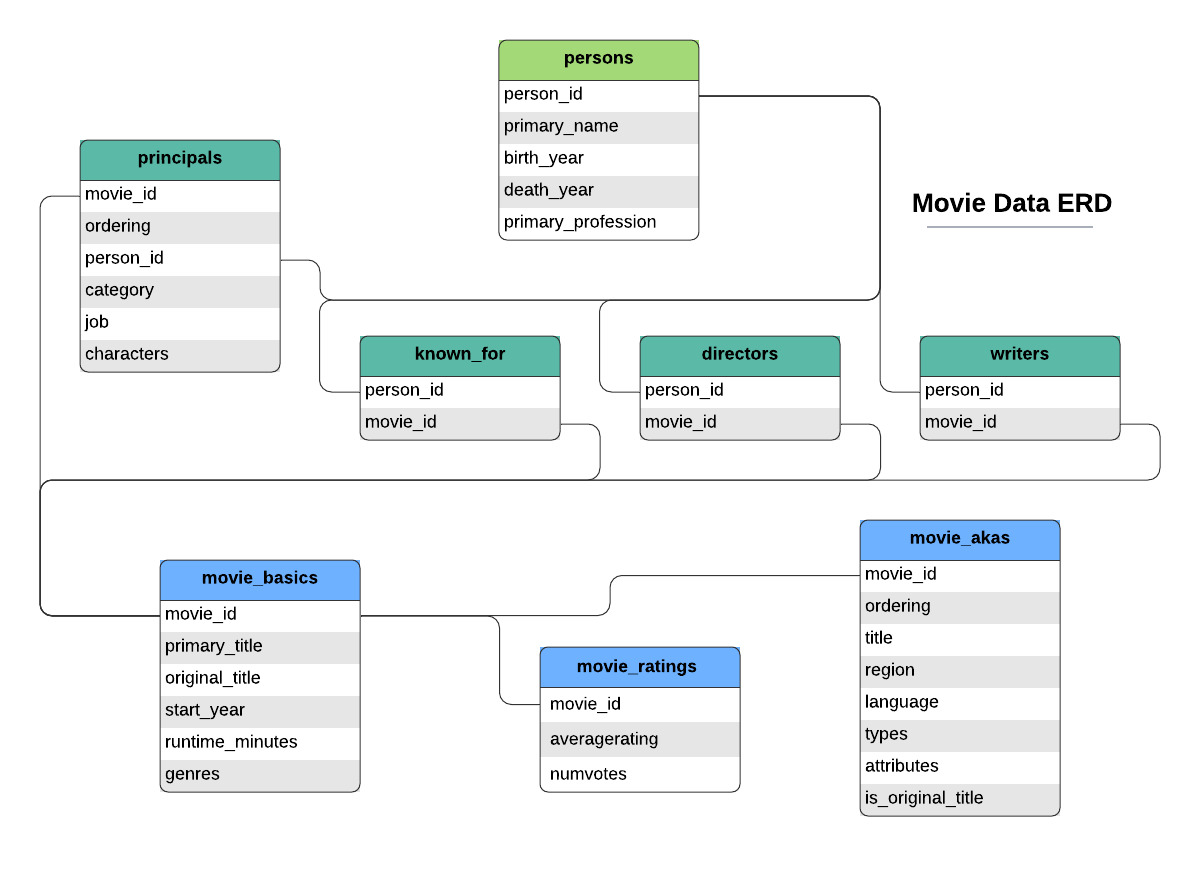

For the sake of analysis we will explore **movie_basics**, **movie_akas**, **principals**, and **persons** tables.

In [12]:
#Querying 'principals' table
pd.read_sql(""" SELECT * FROM principals WHERE(job='producer') LIMIT 2;

""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,3,nm3739909,producer,producer,None
1,tt0323808,6,nm0811056,producer,producer,None


In [13]:
#Querying 'movie_basics' table
pd.read_sql(""" SELECT * FROM movie_basics LIMIT 2;

""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [14]:
#Querying 'persons' table


pd.read_sql(""" SELECT * FROM persons LIMIT 2;

""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"


In [15]:
#Querying 'movie_akas' table
pd.read_sql(""" SELECT * FROM movie_akas LIMIT 2;

""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


In [16]:
#Querying 'known_for' table
pd.read_sql(""" SELECT * FROM known_for LIMIT 2;

""", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241


In [17]:
#Retrieving The Numbers database info
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


"The Numbers" database has domestc gross and worldwide gross data. There is no mising values. 

## Conclusions

For future analysis, we will be using **IMDB**, **Rotten Tomatoes Movies**, **The Numbers**.

From the Rotten Tomatoes dataset, we will retrieve information about the most successful genres at the box office. As there is no notation if the box office information in the database regarding domestic or international sales, for analysis on the latter parameter, we will be using **The Numbers** dataset.

We will create a Pandas DatFrame from IMDB with names of producers and movies and merge it with The Numbers database on the movie title. We will plot the trending genres then. 

We will not be using **Box Office Mojo** database as it contains about twice less records than **The Numbers**.
***


# Data Cleaning and Visualization

In [19]:
# Creating a function for removing punctuation and lowering letters. 
def remove_and_lower_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '').lower()
    return text

## Cleaning Rotten Tomato Dataset

In [20]:
# Printing the dataset head
df_rt_movie.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [21]:
"""
The 'genre' records are separated with delimiter '|'. There is also more than one genre associated with some
records. We need to split each string first. Then we will use 'explode' method for creating a single record for 
every genre.
"""  
# Spliting records. 
df_rt_movie['genre_separated'] = df_rt_movie['genre'].str.split('|')
# Applying 'explode' method
df_rt_movie_expl = df_rt_movie.explode('genre_separated')
df_rt_movie_expl.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_separated
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Classics


In [22]:
# Getting the resulting list of unique genres
df_rt_movie_expl.genre_separated.unique()

array(['Action and Adventure', 'Classics', 'Drama',
       'Science Fiction and Fantasy', 'Musical and Performing Arts',
       'Mystery and Suspense', 'Romance', 'Kids and Family', 'Comedy',
       nan, 'Documentary', 'Special Interest',
       'Art House and International', 'Horror', 'Western', 'Television',
       'Sports and Fitness', 'Animation', 'Faith and Spirituality',
       'Cult Movies', 'Anime and Manga', 'Gay and Lesbian'], dtype=object)

In [23]:
"""
The 'box_office' column contains non-numerical as well as NaN values. We will replace NaN values with 0 (zero)
and then convert to an integer type.
"""
# Replacing NaN with 0
df_rt_movie_expl.box_office.fillna(value=0, inplace=True)
# Replacing non-digit symbols
df_rt_movie_expl['box_office'].replace(to_replace=r'[^0-9.\-]', value=r'', regex=True, inplace=True)
# Converting into 'int64'
df_rt_movie_expl['box_office_int'] = df_rt_movie_expl['box_office'].astype('int64')


In [24]:
df_rt_movie_expl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3581 non-null   int64 
 1   synopsis         3479 non-null   object
 2   rating           3578 non-null   object
 3   genre            3573 non-null   object
 4   director         3138 non-null   object
 5   writer           2560 non-null   object
 6   theater_date     2872 non-null   object
 7   dvd_date         2872 non-null   object
 8   currency         724 non-null    object
 9   box_office       3581 non-null   object
 10  runtime          3529 non-null   object
 11  studio           1062 non-null   object
 12  genre_separated  3573 non-null   object
 13  box_office_int   3581 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 419.6+ KB


In [25]:
# Convert 'genres_separated' to a string for the plotting
df_rt_movie_expl['genre_separated'] = df_rt_movie_expl['genre_separated'].astype('str')
# Replacing 'nan'
df_rt_movie_expl.genre_separated.replace(to_replace='nan', value='Unknown', inplace=True)


In [26]:
# Creating a new dataset without null values in the 'box_office' column
df_rt_movie_no_null = df_rt_movie_expl[df_rt_movie_expl.box_office_int!=0]


In [27]:
# Dividing by 1.0 million for better readability and creating a new column
df_rt_movie_no_null['box_off_mill'] = df_rt_movie_no_null['box_office_int']/1000000


<ipython-input-27-ca34f140bd84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_movie_no_null['box_off_mill'] = df_rt_movie_no_null['box_office_int']/1000000


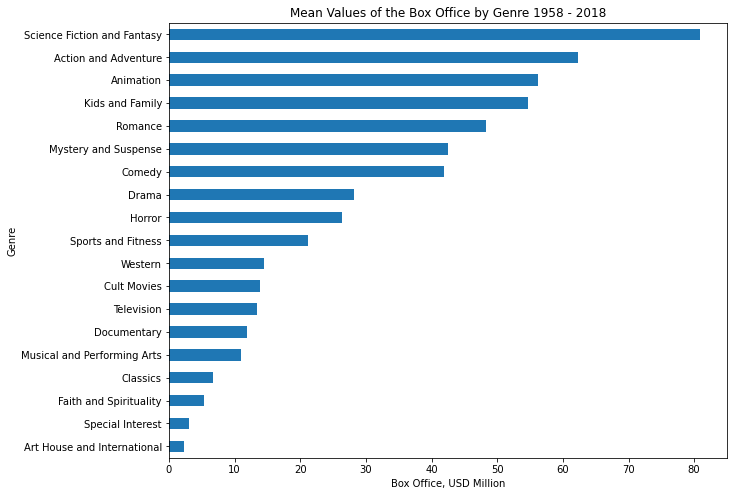

In [28]:
# Plotting
df_rt_movie_no_null.groupby(
    ['genre_separated'])['box_off_mill'].mean().sort_values(ascending=True).plot.barh(figsize=(10,8))
# Labelling
plt.title('Mean Values of the Box Office by Genre 1958 - 2018')
plt.xlabel('Box Office, USD Million')
plt.ylabel('Genre');


## Cleaning The Numbers dataset

In [29]:
# Replacing non-digit symbols
df_budgets['production_budget'].replace(to_replace=r'[^0-9.\-]', value=r'', regex=True, inplace=True)
df_budgets['domestic_gross'].replace(to_replace=r'[^0-9.\-]', value=r'', regex=True, inplace=True)
df_budgets['worldwide_gross'].replace(to_replace=r'[^0-9.\-]', value=r'', regex=True, inplace=True)
# Converting into 'int64'
df_budgets['production_budget'] = df_budgets['production_budget'].astype('int64')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype('int64')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype('int64')

df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [30]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [31]:
df_budgets['total_net'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']

In [32]:
# Getting production budget mean
df_budgets.production_budget.mean()

31587757.0965064

In [33]:
# # Getting production budget median
df_budgets.production_budget.median()

17000000.0

In [34]:
# Retrieving a movie release month
df_budgets['release_month'] = df_budgets.release_date.map(lambda x: x[:4])

In [35]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,Dec


In [36]:
# Dividing by 1.0 million for better readability and creating a new column
df_budgets['worldwide_gross_mill'] = df_budgets['worldwide_gross']/1000000
df_budgets['domestic_gross_mill'] = df_budgets['domestic_gross']/1000000

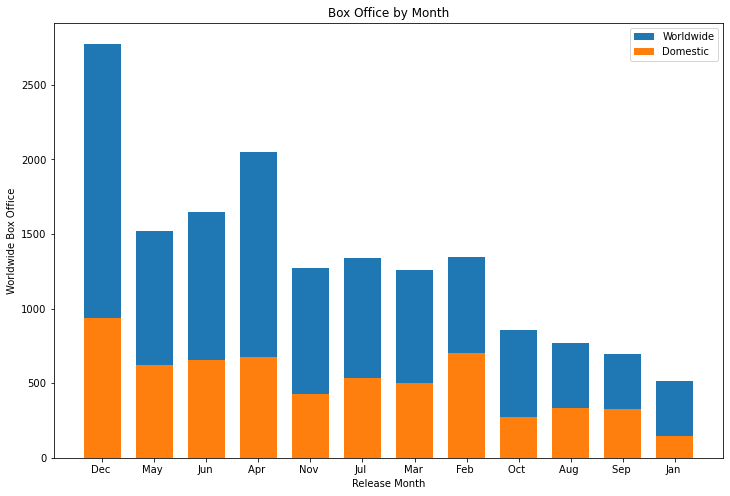

In [37]:
# Plotting domestic and worldwide gross by month
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_budgets['release_month'], df_budgets['worldwide_gross_mill'], width=0.7)
ax.bar(df_budgets['release_month'], df_budgets['domestic_gross_mill'], width=0.7)
# Add lables
plt.title('Box Office by Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Box Office')
ax.legend(('Worldwide', 'Domestic'));

**Merging IMDB and Budgets databases on movie title**

In [38]:
# Creating a database containing movies' data grouped by producers of each movie. 
df_producers_imdb = pd.read_sql(
""" SELECT primary_name, birth_year, death_year, primary_title, start_year, genres
FROM persons 
JOIN principals USING(person_id)
JOIN movie_basics USING(movie_id)
JOIN movie_akas USING(movie_id)
GROUP BY primary_name
HAVING primary_profession LIKE '%producer%' 
;

""", conn)
df_producers_imdb.head()

,primary_name,birth_year,death_year,primary_title,start_year,genres
0,'Cousin Brucie' Morrow,1935.0,NaN,Katz's: That's All,2010,Documentary
1,'Freeway' Ricky Ross,1960.0,NaN,How to Make Money Selling Drugs,2012,"Crime,Documentary"
2,'Om' Rakesh Chaturvedi,NaN,NaN,BHK Bhalla@Halla.Kom,2016,Comedy
3,'Punnagai Poo' Geetha,NaN,NaN,Narthaki,2011,Family
4,50 Cent,1975.0,NaN,Escape Plan,2013,"Action,Crime,Mystery"


In [39]:
df_producers_imdb.count()

primary_name     131126
birth_year        22575
death_year         1079
primary_title    131126
start_year       131126
genres           129591
dtype: int64

***Data cleaning and normalization***

During the next step we will normalize data in both databases to prepare it for joining. 

In [40]:
# Normalizing 'primary_title' column
df_producers_imdb['primary_title'] = df_producers_imdb['primary_title'].apply(remove_and_lower_punctuations)

# Normalizing 'movie' column and creating new column 'primary_title' 
df_budgets['primary_title'] = df_budgets['movie'].apply(remove_and_lower_punctuations)

# Merging
df_budgets_and_producers_imdb = df_producers_imdb.merge(df_budgets, on='primary_title')
df_budgets_and_producers_imdb.head(2)

,primary_name,birth_year,death_year,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net,release_month,worldwide_gross_mill,domestic_gross_mill
0,50 Cent,1975.0,NaN,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965
1,Arnold Schwarzenegger,1947.0,NaN,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965


In [41]:
df_budgets_and_producers_imdb.count()

primary_name            5849
birth_year              2310
death_year               115
primary_title           5849
start_year              5849
genres                  5817
id                      5849
release_date            5849
movie                   5849
production_budget       5849
domestic_gross          5849
worldwide_gross         5849
total_net               5849
release_month           5849
worldwide_gross_mill    5849
domestic_gross_mill     5849
dtype: int64

In [42]:
# Create a separate record for each genre
# Splitting
df_budgets_and_producers_imdb['genres_cleaned'] = df_budgets_and_producers_imdb['genres'].str.split(',')
# Applying the 'explode' method
df_budgets_and_producers_imdb_exploded = df_budgets_and_producers_imdb.explode('genres_cleaned')
df_budgets_and_producers_imdb.head()

,primary_name,birth_year,death_year,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net,release_month,worldwide_gross_mill,domestic_gross_mill,genres_cleaned
0,50 Cent,1975.0,NaN,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,"[Action, Crime, Mystery]"
1,Arnold Schwarzenegger,1947.0,NaN,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,"[Action, Crime, Mystery]"
2,Jason Keller,1968.0,NaN,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,"[Action, Crime, Mystery]"
3,Remington Chase,NaN,NaN,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,"[Action, Crime, Mystery]"
4,A. Scott Berg,1949.0,NaN,genius,2016,"Biography,Drama",10,"Jun 10, 2016",Genius,17000000,1361045,7265283,-9734717,Jun,7.265283,1.361045,"[Biography, Drama]"


In [43]:
# Checking the number of NaN values in genres records
df_budgets_and_producers_imdb_exploded.genres_cleaned.isna().sum()


32

In [44]:
# Drop NaN rows
df_budgets_and_producers_imdb_exploded.dropna(subset='genres_cleaned', inplace=True)
df_budgets_and_producers_imdb_exploded.isna().sum()

primary_name                0
birth_year               7611
death_year              12996
primary_title               0
start_year                  0
genres                      0
id                          0
release_date                0
movie                       0
production_budget           0
domestic_gross              0
worldwide_gross             0
total_net                   0
release_month               0
worldwide_gross_mill        0
domestic_gross_mill         0
genres_cleaned              0
dtype: int64

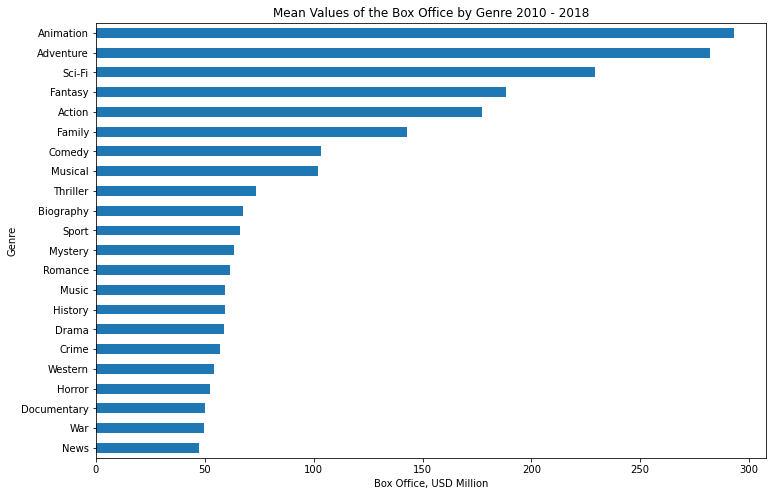

In [45]:
# Plotting mean values of worldwide gross sales by genres
df_budgets_and_producers_imdb_exploded.groupby(
    ['genres_cleaned'])['worldwide_gross_mill'].mean().sort_values(ascending=True).plot.barh(figsize=(12,8));

# Labelling
plt.title('Mean Values of the Box Office by Genre 2010 - 2018')
plt.xlabel('Box Office, USD Million')
plt.ylabel('Genre');


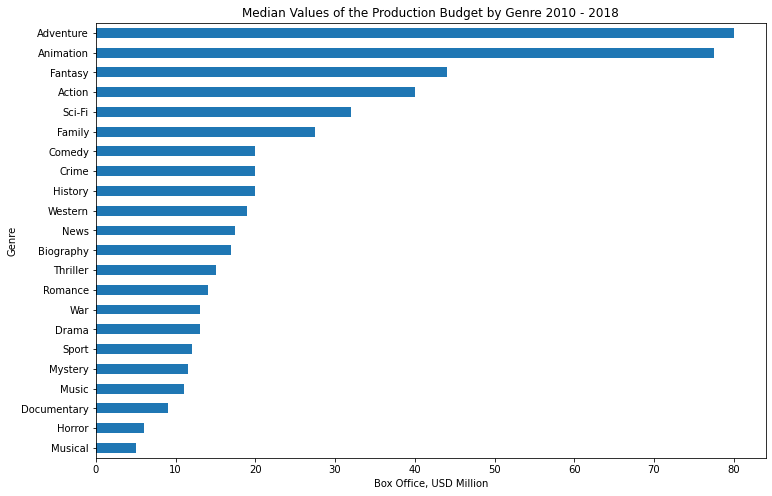

In [46]:
# Plotting median values of production budget by genres
# Divide by 1.0 million
df_budgets_and_producers_imdb_exploded['production_budget_mill'] = df_budgets_and_producers_imdb_exploded[
    'production_budget']/1000000
# Plot
df_budgets_and_producers_imdb_exploded.groupby(
    ['genres_cleaned'])['production_budget_mill'].median().sort_values(ascending=True).plot.barh(figsize=(12,8))

# Labelling
plt.title('Median Values of the Production Budget by Genre 2010 - 2018')
plt.xlabel('Box Office, USD Million')
plt.ylabel('Genre');


In [47]:
# Calculate ROI by genres
df_budgets_and_producers_imdb_exploded['roi_genre_percent'] = ((df_budgets_and_producers_imdb_exploded[
    'worldwide_gross_mill']-df_budgets_and_producers_imdb_exploded[
    'production_budget_mill'])/df_budgets_and_producers_imdb_exploded[
    'production_budget_mill']*100).round(2)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


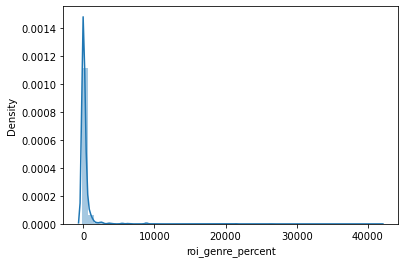

In [48]:
# Plotting distribution
sns.distplot(df_budgets_and_producers_imdb_exploded.roi_genre_percent);

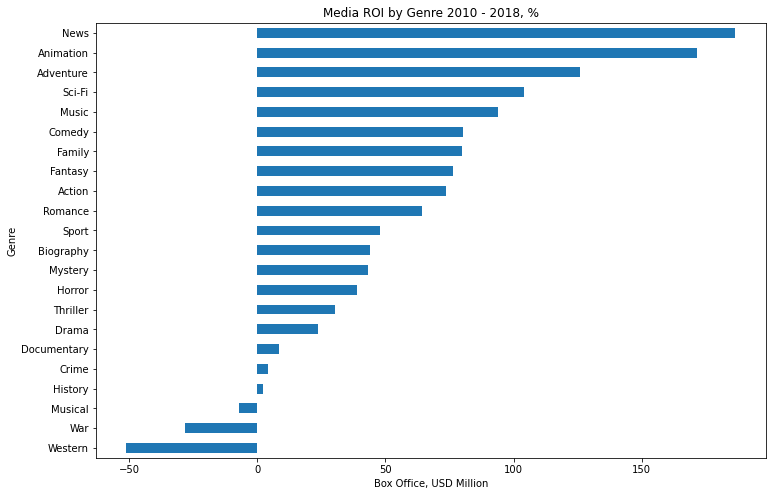

In [49]:
# Plot ROI by genres
df_budgets_and_producers_imdb_exploded.groupby(
    ['genres_cleaned'])['roi_genre_percent'].median().sort_values(ascending=True).plot.barh(figsize=(12,8))

# Labelling
plt.title('Media ROI by Genre 2010 - 2018, %')
plt.xlabel('Box Office, USD Million')
plt.ylabel('Genre');


In [50]:
# Create a DataFrame with mean values for each genre by years
df_imdb_budgets_years_genres = pd.pivot_table(df_budgets_and_producers_imdb_exploded, index='start_year', 
                                                        columns='genres_cleaned', 
                          values='worldwide_gross', aggfunc='mean')
df_imdb_budgets_years_genres

genres_cleaned,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,1.371600e+08,2.649303e+08,4.262830e+08,5.225303e+07,9.806388e+07,3.891749e+07,3.713990e+07,7.370377e+07,1.736161e+08,2.125017e+08,...,1.232582e+08,2.006049e+08,9.525997e+07,NaN,7.260450e+07,6.519192e+07,9.843088e+07,7.655373e+07,7.456544e+07,5.460909e+07
2011,1.783031e+08,2.748490e+08,3.399847e+08,1.992523e+07,1.116498e+08,1.085049e+08,6.882746e+07,6.169200e+07,1.196521e+08,1.589725e+08,...,5.516202e+07,1.823580e+05,9.171277e+07,NaN,6.900599e+07,2.076217e+08,3.203603e+07,7.768746e+07,1.705227e+07,1.217307e+06
2012,2.018982e+08,3.688598e+08,2.582620e+08,6.734096e+07,9.026252e+07,3.881978e+07,5.081050e+07,4.834651e+07,2.281086e+08,2.500966e+08,...,4.728369e+07,2.436000e+03,6.207499e+07,52011974.5,5.770182e+07,3.430403e+08,1.538549e+07,9.742004e+07,2.019462e+07,8.462807e+07
2013,1.588812e+08,2.335612e+08,3.571165e+08,1.440919e+08,9.788852e+07,9.919453e+07,5.673833e+07,7.173324e+07,1.159205e+08,1.029214e+08,...,1.303315e+07,NaN,1.002611e+08,NaN,4.136127e+07,1.676392e+08,3.173704e+07,6.476036e+07,5.422865e+07,2.600021e+08
2014,1.398867e+08,2.253645e+08,2.112647e+08,5.379416e+07,8.465923e+07,4.900321e+07,2.141317e+07,4.080261e+07,8.950483e+07,1.434489e+08,...,1.677113e+07,8.223165e+06,3.825064e+07,62831715.0,4.728016e+07,1.975196e+08,1.411981e+07,3.259058e+07,1.943605e+08,4.954421e+06
2015,1.882882e+08,3.345025e+08,1.871761e+08,8.285541e+07,8.882174e+07,2.397161e+07,4.592322e+07,4.294675e+07,9.305869e+07,1.072571e+08,...,1.599752e+07,0.000000e+00,2.113711e+07,NaN,3.937097e+07,3.689972e+08,5.346588e+07,3.201598e+07,6.606670e+07,2.262807e+06
2016,1.917465e+08,2.394168e+08,3.246850e+08,3.332918e+07,1.704600e+08,6.151042e+07,9.913484e+07,7.293978e+07,1.000252e+08,2.787708e+08,...,3.383326e+07,2.660476e+08,1.106302e+08,12394562.0,8.688601e+07,1.270237e+08,1.520862e+08,6.115739e+07,1.107362e+06,6.657120e+07
2017,2.522327e+08,3.500978e+08,2.936686e+08,9.833773e+07,1.359039e+08,4.719148e+07,5.393617e+07,5.557787e+07,1.162376e+08,2.693234e+08,...,3.004176e+07,1.294224e+08,4.329387e+07,NaN,3.974864e+07,1.448256e+08,0.000000e+00,1.201201e+08,8.908442e+06,NaN
2018,2.867552e+08,3.396477e+08,3.730657e+08,1.272303e+08,8.207225e+07,3.950002e+07,4.584897e+07,6.927862e+07,3.430415e+07,1.695682e+08,...,6.180639e+08,0.000000e+00,2.782195e+07,NaN,1.084987e+08,3.757471e+08,2.135915e+08,1.602149e+08,3.588305e+06,7.840600e+04


In [51]:
# Drop rows and column with a vast majority of NaN's and
df_imdb_budgets_years_genres.drop(columns='News', axis=1, inplace=True)
df_imdb_budgets_years_genres.drop(index=[2020,2021, 2019], inplace=True)

In [52]:
# Divide a dataframe by 1.0 million and round up to 3 decimals
df_imdb_budgets_years_genres = df_imdb_budgets_years_genres/1000000
df_imdb_budgets_years_genres.round(decimals=3)

genres_cleaned,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,137.160,264.930,426.283,52.253,98.064,38.917,37.140,73.704,173.616,212.502,...,63.787,123.258,200.605,95.260,72.605,65.192,98.431,76.554,74.565,54.609
2011,178.303,274.849,339.985,19.925,111.650,108.505,68.827,61.692,119.652,158.972,...,25.414,55.162,0.182,91.713,69.006,207.622,32.036,77.687,17.052,1.217
2012,201.898,368.860,258.262,67.341,90.263,38.820,50.810,48.347,228.109,250.097,...,69.591,47.284,0.002,62.075,57.702,343.040,15.385,97.420,20.195,84.628
2013,158.881,233.561,357.117,144.092,97.889,99.195,56.738,71.733,115.920,102.921,...,64.875,13.033,NaN,100.261,41.361,167.639,31.737,64.760,54.229,260.002
2014,139.887,225.365,211.265,53.794,84.659,49.003,21.413,40.803,89.505,143.449,...,22.965,16.771,8.223,38.251,47.280,197.520,14.120,32.591,194.360,4.954
2015,188.288,334.502,187.176,82.855,88.822,23.972,45.923,42.947,93.059,107.257,...,25.778,15.998,0.000,21.137,39.371,368.997,53.466,32.016,66.067,2.263
2016,191.746,239.417,324.685,33.329,170.460,61.510,99.135,72.940,100.025,278.771,...,36.716,33.833,266.048,110.630,86.886,127.024,152.086,61.157,1.107,66.571
2017,252.233,350.098,293.669,98.338,135.904,47.191,53.936,55.578,116.238,269.323,...,93.815,30.042,129.422,43.294,39.749,144.826,0.000,120.120,8.908,NaN
2018,286.755,339.648,373.066,127.230,82.072,39.500,45.849,69.279,34.304,169.568,...,71.664,618.064,0.000,27.822,108.499,375.747,213.592,160.215,3.588,0.078


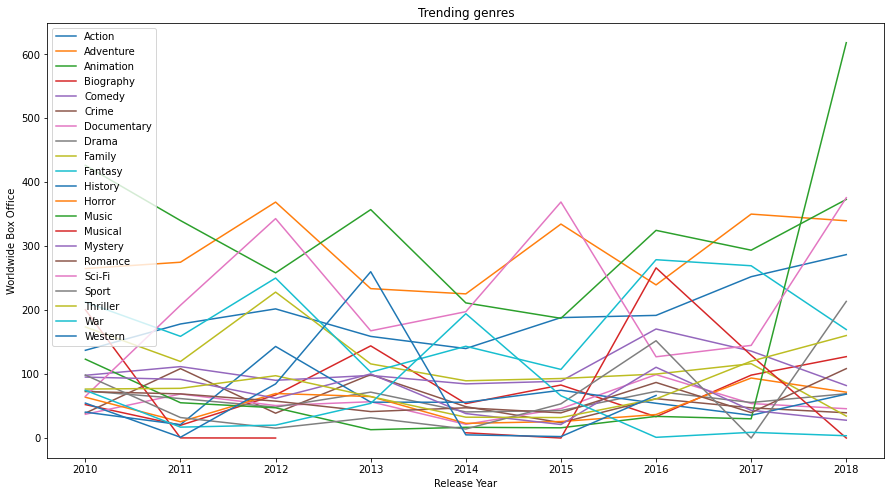

In [53]:
# Plot genres trends


df_imdb_budgets_years_genres.plot(figsize=(15,8))

# Add lables
plt.title('Trending genres')
plt.xlabel('Release Year')
plt.ylabel('Worldwide Box Office')
plt.legend(loc='upper left');


In [54]:
# Fill NaN values 
df_budgets_and_producers_imdb_exploded.fillna(value='Unknown', inplace=True)

In [55]:
df_budgets_and_producers_imdb_exploded

,primary_name,birth_year,death_year,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_net,release_month,worldwide_gross_mill,domestic_gross_mill,genres_cleaned,production_budget_mill,roi_genre_percent
0,50 Cent,1975.0,Unknown,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,Action,70.00,48.19
0,50 Cent,1975.0,Unknown,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,Crime,70.00,48.19
0,50 Cent,1975.0,Unknown,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,Mystery,70.00,48.19
1,Arnold Schwarzenegger,1947.0,Unknown,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,Action,70.00,48.19
1,Arnold Schwarzenegger,1947.0,Unknown,escape plan,2013,"Action,Crime,Mystery",37,"Oct 18, 2013",Escape Plan,70000000,25135965,103735965,33735965,Oct,103.735965,25.135965,Crime,70.00,48.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,Zach Staenberg,1954.0,Unknown,in time,2011,"Action,Crime,Drama",74,"Oct 28, 2011",In Time,35000000,37553932,165103952,130103952,Oct,165.103952,37.553932,Drama,35.00,371.73
5847,Zanda Senkova,1991.0,Unknown,swingers,2016,Comedy,16,"Oct 18, 1996",Swingers,200000,4505922,6618578,6418578,Oct,6.618578,4.505922,Comedy,0.20,3209.29
5848,Ákos Varga,Unknown,Unknown,bodom,2014,"Horror,Mystery,Thriller",54,"Dec 31, 2016",Bodom,1250000,0,726460,-523540,Dec,0.726460,0.000000,Horror,1.25,-41.88
5848,Ákos Varga,Unknown,Unknown,bodom,2014,"Horror,Mystery,Thriller",54,"Dec 31, 2016",Bodom,1250000,0,726460,-523540,Dec,0.726460,0.000000,Mystery,1.25,-41.88


In [56]:
# Filter persons who has a death year in the record
df_producers_likely_alive = df_budgets_and_producers_imdb_exploded[
    df_budgets_and_producers_imdb_exploded['death_year']=='Unknown']

In [57]:
# Select top 3 genres
df_producers_likely_alive_genres = df_producers_likely_alive[
    (df_producers_likely_alive['genres_cleaned']=='Action') 
    |(df_producers_likely_alive['genres_cleaned']=='Sci-Fi') 
    |(df_producers_likely_alive['genres_cleaned']=='Animation')]

In [58]:
# Create a table with likely alive persons, working in top 3 genres, aggregated by worldwide gross box offices.
df_producers_likely_alive_genres_piv = pd.pivot_table(df_producers_likely_alive_genres, index='primary_name', 
                                                        columns='genres_cleaned', 
                          values='worldwide_gross_mill', aggfunc='sum')

In [59]:
# Retrieving top 10 persons in 'Sci-Fi'
df_producers_likely_alive_genres_piv.sort_values('Sci-Fi', ascending=False).head(10).to_excel('scifi.xlsx')
df_producers_likely_alive_genres_piv.sort_values('Sci-Fi', ascending=False).head(10)

genres_cleaned,Action,Animation,Sci-Fi
primary_name,,,
Judy Greer,1648.854864,NaN,1648.854864
Derek Connolly,1648.854864,NaN,1648.854864
Colin Trevorrow,1648.854864,NaN,1648.854864
Chris Pratt,1648.854864,NaN,1648.854864
Patrick Crowley,1648.854864,NaN,1648.854864
Amanda Silver,1648.854864,NaN,1648.854864
Rick Jaffa,1648.854864,NaN,1648.854864
Zak Penn,1566.521313,NaN,1566.521313
Seamus McGarvey,1566.521313,NaN,1566.521313


In [60]:
# Retrieving top 10 persons in 'Action'
df_producers_likely_alive_genres_piv.sort_values('Action', ascending=False).head(10).to_excel('action.xlsx')
df_producers_likely_alive_genres_piv.sort_values('Action', ascending=False).head(10)

genres_cleaned,Action,Animation,Sci-Fi
primary_name,,,
Judy Greer,1648.854864,NaN,1648.854864
Chris Pratt,1648.854864,NaN,1648.854864
Rick Jaffa,1648.854864,NaN,1648.854864
Patrick Crowley,1648.854864,NaN,1648.854864
Derek Connolly,1648.854864,NaN,1648.854864
Colin Trevorrow,1648.854864,NaN,1648.854864
Amanda Silver,1648.854864,NaN,1648.854864
Zak Penn,1566.521313,NaN,1566.521313
Scarlett Johansson,1566.521313,NaN,1566.521313


In [61]:
# Retrieving top 10 persons in 'Animation'
df_producers_likely_alive_genres_piv.sort_values('Animation', ascending=False).head(10).to_excel('animation.xlsx')
df_producers_likely_alive_genres_piv.sort_values('Animation', ascending=False).head(10)

genres_cleaned,Action,Animation,Sci-Fi
primary_name,,,
Shane Morris,NaN,1272.469910,NaN
Peter Del Vecho,NaN,1272.469910,NaN
Nicole Paradis Grindle,1242.520711,1242.520711,NaN
Craig T. Nelson,1242.520711,1242.520711,NaN
John Walker,1242.520711,1242.520711,NaN
Tom Hanks,NaN,1068.879522,NaN
Tim Allen,NaN,1068.879522,NaN
John Lasseter,NaN,1068.879522,NaN
Michael Arndt,NaN,1068.879522,NaN


***

## Conclusions

After reviewing and analyzing the data, we can make the following suggestions.

### Genres
The genres with the maximum median box offices and return of investments are: 

- Action and Adventure;
- Sci-Fi;
- Animation.

The most trending genres are also Sci-Fi, Action, and Animation. The 'News' genre shows the maximum median ROI, but the box office is relatively low. 

### Release months

According to the maximum box offices by the month of a movie release, the top 3 months are:

- December;
- February;
- April.

Whereas the top worst are:

- August;
- September;
- January. 

### Producers

The top 10 persons working in either of the three top genres we recommend hiring or consulting with are: 

**Sci-Fi**
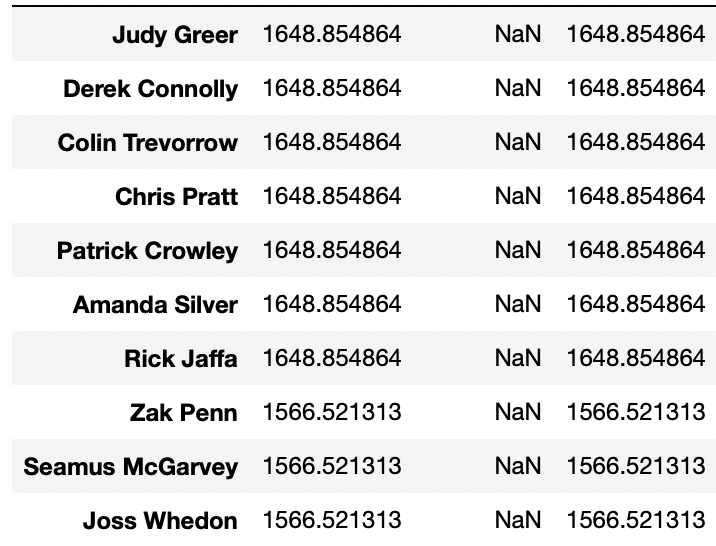

**Action**
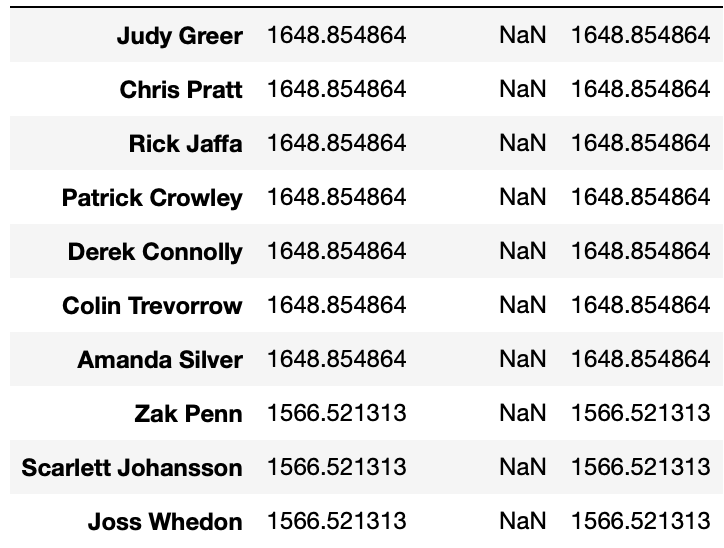

**Animation**
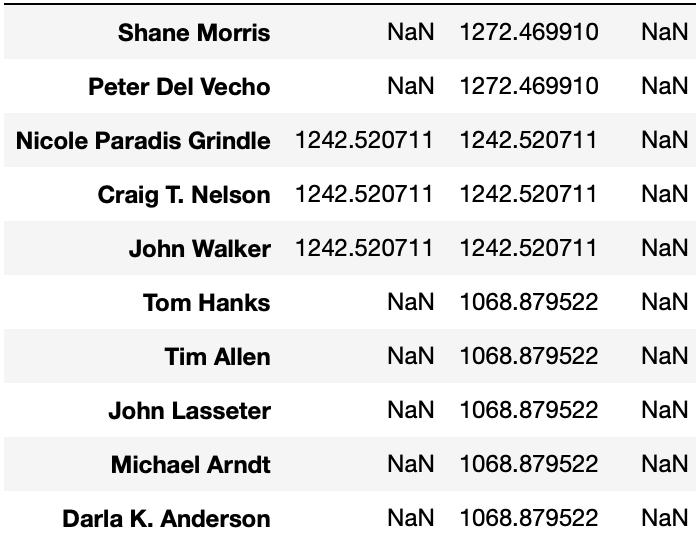

### Further study

Further study on box offices by region suggested.

***